In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

In [7]:
prompts = pd.read_csv("prompts_train.csv")
prompts.head()

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [8]:
summaries = pd.read_csv("summaries_train.csv")
summaries.head()

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


In [9]:
merged_df = pd.merge(prompts,summaries, on='prompt_id')
merged_df

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886
...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.520355,-0.292990
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.204574,-1.169784
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.328739,-1.053294
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.205683,0.380538


Exploratory Data Analysis

In [10]:
#Student IDs doesn't seem to any repeat
merged_df['student_id'].value_counts()


student_id
00791789cc1f    1
a219f176d5df    1
a450e0d1af93    1
a3f9356548d9    1
a3b99068bb80    1
               ..
27d3a7b7772d    1
27c33391ed16    1
27c0e12bbe6d    1
27a063ff5be2    1
fffbccfd8a08    1
Name: count, Length: 7165, dtype: int64

/Users/deniztemurtas/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/deniztemurtas/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/deniztemurtas/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/deniztemurtas/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

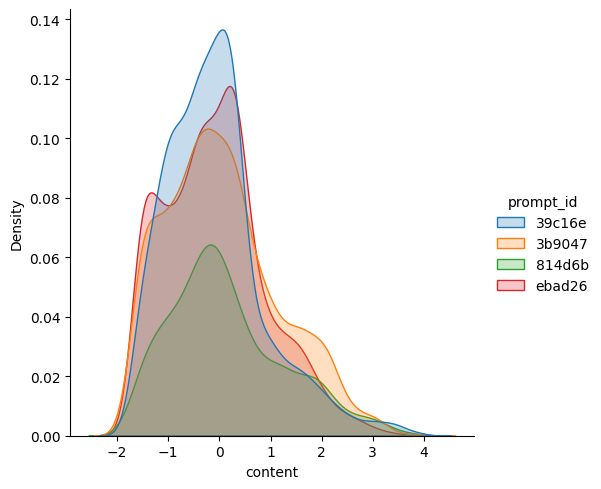

In [11]:
#Distplot shows that content value in x-axis and number of value at each bin in y-axis 
sns.displot(merged_df, x='content', hue='prompt_id', kind='kde', fill=True)
#merged_df['content'].max(), merged_df['content'].min()

/Users/deniztemurtas/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/deniztemurtas/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/deniztemurtas/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/deniztemurtas/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

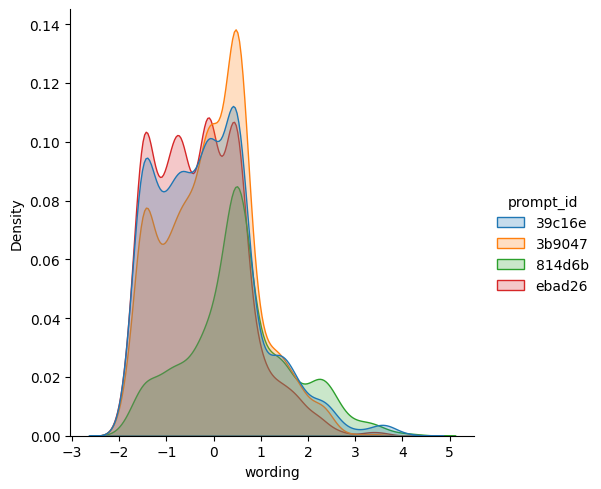

In [12]:
#Distplot shows that wording value in x-axis and number of value at each bin in y-axis 
sns.displot(merged_df, x='wording', hue='prompt_id', kind='kde', fill=True)

/Users/deniztemurtas/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/deniztemurtas/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/deniztemurtas/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/deniztemurtas/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

<Axes: xlabel='content', ylabel='wording'>

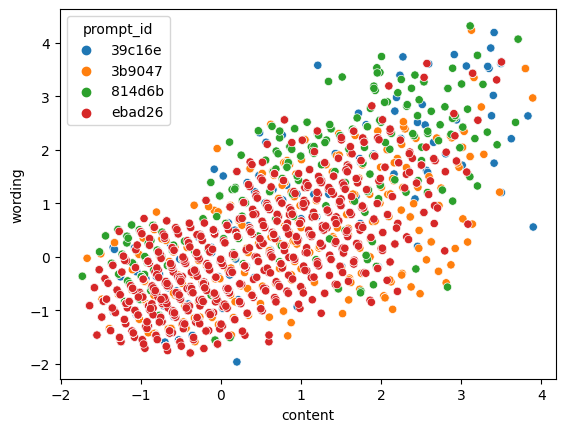

In [13]:
#Scatterplot of content vs wording values coloured by their prompt_id
sns.scatterplot(data= merged_df, x='content', y='wording', hue='prompt_id')

In [14]:
# ckeck if any null value is present
merged_df.isnull().values.any()

#merged_df.dropna(inplace=True)

False

In [15]:
# ckeck if any duplicate value is present
merged_df.duplicated().values.any()

#merged_df.drop_duplicates(inplace=True)
#merged_df.reset_index(inplace=True,drop=True)

False

There isn't any null or duplicate value

In [16]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

Clean function:
It takes string as input and removes characters like -+@#^/|*(){}$~` while not removing ,.!-:;"' as these characters are present in english language. 
Also it removes characters inside <> while {},[] and () should be stay same. Because students are used them as bullet/numbering and if we remove them it may cause some misunderstanding in the sentence. 

In [17]:
def clean(text):
    text = re.sub('<.*>', '', text)
    #text = re.sub('\(.*\)', '', text)
    #text = re.sub('\[.*\]', '', text)
    #text = re.sub('{.*}', '', text)
    text = re.sub("[-+@#^\/|*{}$~`<>=_]"," ",text)
    text = text.replace("\\","")
    text = re.sub("\[","",text)
    text = re.sub("\]","",text)
    return text

In [18]:
merget_df_text = merged_df.loc[:,"text"]
my_list = list(merget_df_text)


In [19]:
merget_df_text.to_csv('/Users/deniztemurtas/Evaluation-of-Student-Summaries/merged.csv')

We can see the example below that in the cleaned text an adjective well-thought-out is transformed as well thought out.

In [20]:
my_list[2]

'Aristotle states that an ideal tragedy should have a "complex plan" (a well-thought-out plot), "imitate actions which excite pity and fear" (present ideas that might evoke certain emotions from the audience), and should only have a "single... issue", with the "change of fortune" being from "good to bad" (or a character\'s downfall). '

In [21]:
clean(my_list[2])

'Aristotle states that an ideal tragedy should have a "complex plan" (a well thought out plot), "imitate actions which excite pity and fear" (present ideas that might evoke certain emotions from the audience), and should only have a "single... issue", with the "change of fortune" being from "good to bad" (or a character\'s downfall). '

In [22]:
# Whole list is cleaned as a new list
my_new_list = list()
for i in range(len(my_list)):
    my_new_list.append(clean(my_list[i]))
len(my_new_list)

7165

In [23]:
# Add cleaned texts to our df
se = pd.Series(my_new_list)
merged_df['clean_text'] = se.values
merged_df_old = merged_df
merged_df_old

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,clean_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415,1 element of an ideal tragedy is that it shoul...
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058,The three elements of an ideal tragedy are: H...
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181,Aristotle states that an ideal tragedy should ...
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710,One element of an Ideal tragedy is having a co...
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886,The 3 ideal of tragedy is how complex you need...
...,...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.520355,-0.292990,"In paragraph two, they would use pickle meat a..."
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.204574,-1.169784,"in the first paragraph it says ""either can it..."
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.328739,-1.053294,They would have piles of filthy meat on the fl...
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.205683,0.380538,They used all sorts of chemical concoctions to...


In [24]:
merged_df = merged_df_old.drop(columns='text')

Train Test Splitting

In [25]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install tensorflow

  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.3.0 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.6.3 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install sklearn

  Using cached sklearn-0.0.post9.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2952 sha256=85d71566a32c82fa367484cca9c00ec6be02d850f62a62286b5eb1ab2648d3bd
  Stored in directory: /Users/deniztemurtas/Library/Caches/pip/wheels/8e/21/72/6e096fe9f5263038bd31fdf055d8e30f117956f015faba3c06
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install spacy

  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.7.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [29]:
import re
from collections import Counter
import string
from sklearn.model_selection import train_test_split
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [30]:
import spacy
from spacy.lang.en.examples import sentences 

In [31]:
data = merged_df
data.head()

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,content,wording,clean_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,-0.210614,-0.471415,1 element of an ideal tragedy is that it shoul...
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,-0.970237,-0.417058,The three elements of an ideal tragedy are: H...
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,-0.387791,-0.584181,Aristotle states that an ideal tragedy should ...
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,0.088882,-0.594710,One element of an Ideal tragedy is having a co...
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,-0.687288,-0.460886,The 3 ideal of tragedy is how complex you need...


In [32]:
#pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

In [33]:
#pip uninstall https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz --no-deps

In [34]:
pip install pypi

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install spacy==2.3.5

  Using cached spacy-2.3.5.tar.gz (5.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached thinc-7.4.6-cp310-cp310-macosx_11_0_arm64.whl (898 kB)
  Using cached srsly-1.0.7-cp310-cp310-macosx_11_0_arm64.whl (367 kB)
  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for spacy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [952 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.1-arm64-cpython-310
      creating build/lib.macosx-11.1-arm64-cpython-310/bin
      copying bin/train_word_vectors.py -> build/lib.macosx-11.1-arm64-cpython-310/bin
      copying bin/cyt

In [37]:
# Tokenization
tok = spacy.load("en_core_web_sm")
def tokenize (text):
    text = re.sub(r"[^\x00-\x7F]+", " ", text)
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]') # remove punctuation and numbers
    nopunct = regex.sub(" ", text.lower())
    return [token.text for token in tok.tokenizer(nopunct)]

In [38]:
# Count number of occurences of each word
counts = Counter()
for text in list(data['clean_text']):
    counts.update(tokenize(text))

In [39]:
# Deleting infrequent words
print("num_words before:",len(counts.keys()))
for word in list(counts):
    if counts[word] < 2:
        del counts[word]
print("num_words after:",len(counts.keys()))

num_words before: 12186
num_words after: 5561


In [40]:
# Creating vocabulary
vocab2index = {"":0, "UNK":1}
words = ["", "UNK"]
for word in counts:
    vocab2index[word] = len(words)
    words.append(word)

In [41]:
vocab2index

{'': 0,
 'UNK': 1,
 '  ': 2,
 'element': 3,
 'of': 4,
 'an': 5,
 'ideal': 6,
 'tragedy': 7,
 'is': 8,
 'that': 9,
 'it': 10,
 'should': 11,
 'be': 12,
 'arranged': 13,
 'on': 14,
 'a': 15,
 'complex': 16,
 'plan': 17,
 'another': 18,
 'only': 19,
 'have': 20,
 'one': 21,
 'main': 22,
 'issue': 23,
 ' ': 24,
 'the': 25,
 'last': 26,
 'double': 27,
 'thread': 28,
 'plot': 29,
 'and': 30,
 'opposite': 31,
 'catastrophe': 32,
 'for': 33,
 'both': 34,
 'good': 35,
 'bad': 36,
 'three': 37,
 'elements': 38,
 'are': 39,
 'having': 40,
 'character': 41,
 'isn': 42,
 't': 43,
 'misfortune': 44,
 'befall': 45,
 'them': 46,
 '   ': 47,
 'no': 48,
 'subplots': 49,
 'ending': 50,
 'in': 51,
 'death': 52,
 'aristotle': 53,
 'states': 54,
 'well': 55,
 'thought': 56,
 'out': 57,
 'imitate': 58,
 'actions': 59,
 'which': 60,
 'excite': 61,
 'pity': 62,
 'fear': 63,
 'present': 64,
 'ideas': 65,
 'might': 66,
 'evoke': 67,
 'certain': 68,
 'emotions': 69,
 'from': 70,
 'audience': 71,
 'single': 72,
 '

In [42]:
def encode_sentence(text, vocab2index, N=200):
    tokenized = tokenize(text)
    encoded = np.zeros(N, dtype=int)
    enc1 = np.array([vocab2index.get(word, vocab2index["UNK"]) for word in tokenized])
    length = min(N, len(enc1))
    encoded[:length] = enc1[:length]
    return encoded, length

In [43]:
type(data['clean_text'])

pandas.core.series.Series

In [44]:
np.shape(data['clean_text'])

(7165,)

In [45]:
data['clean_text'][1]

"The three elements of an ideal tragedy are:  Having a character that isn't bad have misfortune befall them.,  Having no subplots, and ending in death.  "

In [46]:
data['encoded'] = data['clean_text'].apply(lambda x: np.array(encode_sentence(x,vocab2index )[0]))
data.head()

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,content,wording,clean_text,encoded
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,-0.210614,-0.471415,1 element of an ideal tragedy is that it shoul...,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1..."
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,-0.970237,-0.417058,The three elements of an ideal tragedy are: H...,"[25, 37, 38, 4, 5, 6, 7, 39, 2, 40, 15, 41, 9,..."
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,-0.387791,-0.584181,Aristotle states that an ideal tragedy should ...,"[53, 54, 9, 5, 6, 7, 11, 20, 15, 24, 16, 17, 2..."
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,0.088882,-0.594710,One element of an Ideal tragedy is having a co...,"[21, 3, 4, 5, 6, 7, 8, 40, 15, 16, 17, 9, 81, ..."
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,-0.687288,-0.460886,The 3 ideal of tragedy is how complex you need...,"[25, 2, 6, 4, 7, 8, 94, 16, 95, 96, 77, 97, 10..."


In [47]:
class CommonLitReadabiltyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return torch.from_numpy(self.X[idx][0].astype(np.int32)), self.y[idx], self.X[idx][1]

In [48]:
X = list(data['encoded'])
y = list(data['content'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

train_ds = CommonLitReadabiltyDataset(X_train, y_train)
valid_ds = CommonLitReadabiltyDataset(X_valid, y_valid)

In [49]:
import tensorflow as tf

In [50]:
from keras import layers 

In [51]:
from tensorflow import keras